<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [30]:
#Start Here
import pandas as pd
import spacy
import re
import seaborn as sns
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from spacy.tokenizer import Tokenizer

In [3]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [5]:
print(df.shape)
df.head()

(28332, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [6]:
# View Categories.
df['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

In [7]:
# Let's select Health & Beauty to look at reviews.
df = df[df['primaryCategories'] == 'Health & Beauty'].copy()
print(df.shape)
df.head()

(12071, 24)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [11]:
# Now let's use Spacy to tokenize.
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [12]:
STOP_WORDS = nlp.Defaults.stop_words.union(["amazon","battery","duracell","batteries.","batteries,","batteries","price."])

In [13]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) and (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())
            
    tokens.append(doc_tokens)
        
df['tokens'] = tokens

In [14]:
df['tokens'].head()

0    [order, 3, item, bad, quality., miss, backup, ...
1                [bulk, expensive, way, product, like]
2                                      [price, happy.]
3                           [work, brand, well, price]
4                          [long, last, price, great.]
Name: tokens, dtype: object

In [15]:
# Gensim dictionary.
id2word = Dictionary(df['tokens'])
print(len(id2word))

9803


In [16]:
print(id2word[106])
print(id2word[5000])
print(id2word[204])

day
savings!
thanks..


In [17]:
print(len(id2word))

9803


In [18]:
corpus = [id2word.doc2bow(token) for token in df['tokens']]

In [19]:
len(corpus) 

12071

In [20]:
len(corpus[0])

11

In [21]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [22]:
lda_model = LdaMulticore(
    corpus=corpus, 
    num_topics=5, 
    id2word=id2word, 
    workers=4, 
    passes=5)

In [23]:
lda_model.print_topics()

[(0,
  '0.020*"buy" + 0.013*"work" + 0.013*"brand" + 0.013*"purchase" + 0.011*"long" + 0.008*"don\'t" + 0.008*"love" + 0.008*"product" + 0.007*"price" + 0.007*"lot"'),
 (1,
  '0.041*"great" + 0.030*"long" + 0.016*"buy" + 0.015*"work" + 0.013*"deal" + 0.013*"use" + 0.012*"brand" + 0.010*"don\'t" + 0.009*"i\'m" + 0.008*"good"'),
 (2,
  '0.062*"great" + 0.042*"work" + 0.039*"price" + 0.023*"good" + 0.019*"buy" + 0.012*"brand" + 0.010*"like" + 0.009*"product" + 0.008*"well" + 0.008*"can\'t"'),
 (3,
  '0.070*"good" + 0.019*"brand" + 0.019*"cheap" + 0.019*"work" + 0.014*"long" + 0.013*"buy" + 0.010*"price" + 0.009*"great." + 0.008*"great" + 0.008*"like"'),
 (4,
  '0.036*"good" + 0.034*"long" + 0.030*"great" + 0.016*"value" + 0.016*"last" + 0.013*"price" + 0.010*"quality" + 0.009*"works" + 0.009*"time" + 0.008*"brand"')]

In [25]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda_model.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
buy work brand purchase long

------ Topic 1 ------
great long buy work deal

------ Topic 2 ------
great work price good buy

------ Topic 3 ------
good brand cheap work long

------ Topic 4 ------
good long great value last



In [32]:
# Now let's make the "dope" visualizations.
distro = [lda_model[d] for d in corpus]
num_topics = 4

def update(doc):
        d_dist = {k:0 for k in range(0,num_topics)}
        for topic in doc:
            d_dist[topic[0]] = topic[1]
        return d_dist
    
new_distro = [update(d) for d in distro]

In [33]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.059887  0.067558       1        1  23.758999
2      0.066014 -0.010113       2        1  22.379318
1     -0.069005  0.004360       3        1  21.014620
4     -0.014958 -0.105879       4        1  16.465300
3      0.077836  0.044074       5        1  16.381760, topic_info=        Term         Freq        Total Category  logprob  loglift
61      good  2538.000000  2538.000000  Default  30.0000  30.0000
70     great  3047.000000  3047.000000  Default  29.0000  29.0000
17     price  1517.000000  1517.000000  Default  28.0000  28.0000
46     cheap   462.000000   462.000000  Default  27.0000  27.0000
23      long  1851.000000  1851.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
267  brands.    69.873787   322.792786   Topic5  -5.4616   0.2787
103      use    98.931213   756.578552   Topic5  -5.1138  -0.2254
98      love    79.942856   509.005127   Topic5  -5.3270  -0.0421
70     great   138.558578  3047.966797   Topic5  -4.7770  -1.2819
190     time    76.469002   542.564575   Topic5  -5.3714  -0.1504

[421 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7178      4  0.824357  (mwh),
161       1  0.366513       2
161       2  0.251746       2
161       3  0.199916       2
161       4  0.133277       2
...     ...       ...     ...
169       3  0.407093    xbox
169       4  0.110398    xbox
169       5  0.062099    xbox
2094      3  0.882036     yay
2079      2  0.765456    yup,

[928 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2, 5, 4])

In [34]:
topics = pd.DataFrame.from_records(new_distro)
topics.head()

,0,1,2,3,4
0,0.493842,0.267194,0.205148,0.016921,0.016895
1,0.034216,0.034424,0.863416,0.034022,0.033923
2,0.067330,0.358725,0.439479,0.067178,0.067289
3,0.040524,0.040576,0.837425,0.040949,0.040526
4,0.040404,0.040756,0.041511,0.337484,0.539846


In [35]:
df['primaryTopic'] = topics.idxmax(axis=1)
df[['primaryTopic', 'reviews.rating']].groupby('primaryTopic').mean()

,reviews.rating
primaryTopic,
0.0,4.077834
1.0,4.363873
2.0,4.677932
3.0,4.503517
4.0,4.420276


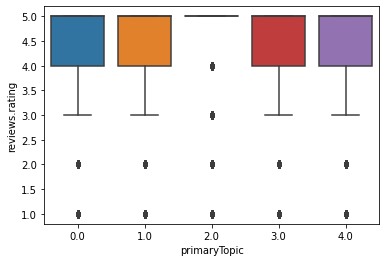

In [36]:
ax = sns.boxplot(x="primaryTopic", y="reviews.rating",
                 data=df)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling